# <center> R1.13 introduction à Python <br> TP2 - Matrice et Numpy : R1.07 en python </center>
<center> 2023/2024 - Thibault Godin </center>
<center> IUT de Vannes, BUT Informatique </center>

***

Le but principal de ce TP est de reprendre des notions vues en  R1.07 et en particulier le produit matriciel (et le pivot de Gauss pour les plus rapides.

C'est une bonne occasion de manipuler les tableaux 2D, ce qui arrive très souvent (images, graphes, données ...)

In [2]:
import numpy as np



import time
import random
import matplotlib.pyplot as plt


# Calcul matriciel en python



Voici quelques commandes python et numpy dont vous pourrez avoir besoin par la suite :

| | |
|-|-|
|`a*b`| Calcule le produit $a\times b$ |
| `a**b` | Calcule $a^b$ |
| `x=2` | Affecte $2$ à la variable `x` 
|`np.array([1, 2, 3])`| Définit un vecteur 1D |
| `np.array([[1, 2, 3], [4, 5, 6]])` | Définit une matrice 2D dans $\mathcal{M}_{2,3}(\mathbb{R})$ |
| `np.array([[1, 2, 3], [4, 5, 6]],int)` | Définit une matrice 2D dans $\mathcal{M}_{2,3}(\mathbb{Z})$ |
| `x[2]` | Renvoie le 3e coefficient du vecteur 1D `x` |
| `A.T` | Transpose la matrice `A` |
| `A@x` ou `A@B` | Calcule le produit matriciel entre `A` et `x` (ou `A` et `B`) |
| `x + 2` | Ajoute 2 à tous les coefficients du vecteur `x` |
| `np.ones(3)`, ou `np.zeros(3)` | Définit un vecteur 1D rempli de 1, ou 0|
| `np.ones((2,3))`, ou `np.zeros((2,3))` | Définit une matrice 2D dans $\mathcal{M}_{2,3}(\mathbb{R})$ remplie de 1, ou 0 |
| `np.full((2,3),4)` | Définit une matrice 2D dans $\mathcal{M}_{2,3}(\mathbb{R})$ remplie de 4 |
| `A.shape` | Renvoie les dimensions de la matrice `A` |
| `A[2,0]` | Renvoie le coefficient de la 3e ligne, 1ère colonne de la matrice `A` |
| `A[2,:]` (ou `A[:,2]` ) | Renvoie la 3e ligne (ou colonne) de la matrice `A` (comme vecteur 1D) |
| `A[:, :11]` | Renvoie les 11 premières colonnes de la matrice `A` |
| `np.abs(x)` | Applique la valeur absolue à tous les coefficients du vecteur `x` |




Dans 99% des cas à l'IUT de Vannes (et dans une grande majorité des cas en général) le concept mathématique "matrice" se traduit par "numpy array" en python. Ce sera le cas pour tout le TP

_attention : les np.matrix existent mais sont obsolettes et dépréciées. Il ne faut donc pas les utiliser. On les remplace quasi sans changement par np.array dans la quasitotalité des cas_


## Déclaration et accès


>**_question 1_**<br>
En vous inspirant du tableau ci dessous, créer les matrices  (`numpy array`) :
$$A = \begin{pmatrix} 1 & 0 & -5 \\ 2 & -4 & 6  \end{pmatrix}\qquad B = \begin{pmatrix} -2 & -3 & 4 \\ 1 & -4 & -5 \end{pmatrix} \qquad C = \begin{pmatrix} 1 & 0 \\ -1 & 2 \\ 2 & 2 \end{pmatrix}$$
En utilisant `shape`, determiner les tailles. Remarquer que `len` apporte moins d'information.

In [3]:
a = np.array([[1, 0, -5], [2, -4, 6]])
b = np.array([[-2, -3, 4], [1, -4, -5]])
c = np.array([[1, 0], [-1, 2], [2, 2]])
print(len(a), a.shape)

2 (2, 3)


>**_question 2_**<br>
Calculer $2A -3B$

In [4]:
print(2*a - 3*b)

[[  8   9 -22]
 [  1   4  27]]


>**_question 3_** **Slicing 2D**<br>
Soit la matrice $S$ donné ci-dessous.<br>
\begin{pmatrix}
  0 & 1 & 2 & 3 & 4 & 5\\
  6 & 7 & 8 & 9 & 10 & 11\\
  12 & 13 & 14 & 15 & 16 & 17\\
  18 & 19 & 20 & 21 & 22 & 23\\
  24 & 25 & 26 & 27 & 28 & 29\\
  30 & 31 & 32 & 33 & 34 & 35\\
\end{pmatrix}
Renvoyer
- le coefficient $S_{0,1}$
- la première ligne
- la deuxième colonne
- les coefficients en ligne paire de la 3ème colonne


In [5]:
S = np.arange(36)
S = S.reshape((6, 6))
print(S)

print(S[0][1])
print(S[0])
for i in range(len(S)):
    print(S[i][1])
for j in range(len(S)):
    if j % 2 == 0:
        print(S[j][2])



[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]
 [30 31 32 33 34 35]]
1
[0 1 2 3 4 5]
1
7
13
19
25
31
2
14
26


>**_question 4_** **Masque**<br>
Comment interprétez vous le résultat de `S<3` ? <br>
Que ce passe-t-il dans le code suivant ?
> Cela remplace pour chaque valeur un booléen :
- True si c'est inferieur à 3
- False si c'est superieur ou égal à 3

In [6]:
S < 3

array([[ True,  True,  True, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False]])

>**_question 4b_** **masque, bonus**<br>
Renvoyer la matrice des coeficients de $S$ tels que la somme des indices est paire
On pourra utiliser `np.indices`

In [7]:

S = np.indices


## Opérations sur les matrices


>**_question 1_**<br>
Créer les matrices  (`numpy array`) :

$$
A = \begin{pmatrix}
  1 & 0 & 0\\
  0 & 1 & 1\\
  3 & 1 & 1\\
\end{pmatrix} \qquad B = \begin{pmatrix}
  1 & 1 & 1\\
  0 & 1 & 0\\
  1 & 0 & 0\\
\end{pmatrix}
\qquad C =
\begin{pmatrix}
  1 & 1 & 1\\
  1 & 2 & 1\\
  0 & -1 & -1\\
\end{pmatrix}
$$
Calculer `A*B`. Est-ce l'opération vue en R1.07 ?



In [8]:
A = np.array([[1, 0, 0], [0, 1, 1], [3, 1, 1]])
B = np.array([[1, 1, 1], [0, 1, 0], [1, 0, 0]])
C = np.array([[1, 1, 1], [1, 2, 1], [0, -1, -1]])
A*B
#Non ce n'est pas la même opération

array([[1, 0, 0],
       [0, 1, 0],
       [3, 0, 0]])

>**_question 2_**<br>
Calculer $AB$ et $AC$ (en utilisant `@` ou `np.dot`)

In [9]:
A@B
A@C

array([[1, 1, 1],
       [1, 1, 0],
       [4, 4, 3]])

>**_question 3_**<br>
Vérifier avec python que $AB = AC$. <br>
En déduire que $A$ n’est pas inversible.

Si A inversible alors :
$A^{-1}AB = A^{-1}AC <=> B = C$ Absurde donc A pas inversible 

In [10]:
A@B == A@C


array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

## Multiplication naïve


>**_question 1_** **Echauffement : Matrice de Hilbert**<br>
À l'aide d'une double boucle `for` écrire une fonction qui renvoie la matrice de Hilbert d'ordre $n$, c'est-à-dire la matrice carrée de taille $n \times n$ de terme général
:$H_{i,j} = \frac{1}{i+j-1}$.
La matrice de Hilbert de taille 5 vaut donc
$$\mathcal{H} = \begin{pmatrix} 
1 & \frac{1}{2} & \frac{1}{3} & \frac{1}{4} & \frac{1}{5} \\[4pt]
\frac{1}{2} & \frac{1}{3} & \frac{1}{4} & \frac{1}{5} & \frac{1}{6} \\[4pt]
\frac{1}{3} & \frac{1}{4} & \frac{1}{5} & \frac{1}{6} & \frac{1}{7} \\[4pt]
\frac{1}{4} & \frac{1}{5} & \frac{1}{6} & \frac{1}{7} & \frac{1}{8} \\[4pt]
\frac{1}{5} & \frac{1}{6} & \frac{1}{7} & \frac{1}{8} & \frac{1}{9} \end{pmatrix} $$

In [11]:
def Hilbertmat(n):
    H = np.ones((n,n))
    for i in range(n):
        for j in range(n):
            H[i][j] = 1 / (i + j - 1)
    return H



>**_question 1b_** **Echauffement bonus : Matrice de Vandermonde**<br>
À l'aide d'une unique boucle `for`, écrire une fonction qui renvoie la matrice de Vandermonde associée au vecteur  $A=\begin{pmatrix}
 \alpha_1\\
\alpha_2 \\
 \alpha_3\\
\vdots \\
\alpha_n\\
\end{pmatrix}$ , c'est-à-dire la matrice carrée de taille $n \times n$ de terme général $V_{i,j} = {\alpha_i}^{j-1}$
On a donc $$V=\begin{pmatrix}
1 & \alpha_1 & {\alpha_1}^2 & \dots & {\alpha_1}^{n-1}\\
1 & \alpha_2 & {\alpha_2}^2 & \dots & {\alpha_2}^{n-1}\\
1 & \alpha_3 & {\alpha_3}^2 & \dots & {\alpha_3}^{n-1}\\
\vdots & \vdots & \vdots & &\vdots \\
1 & \alpha_n & {\alpha_n}^2 & \dots & {\alpha_n}^{n-1}\\
\end{pmatrix}$$



In [12]:
def Vandermondemat(A):
    n = len(A)
    V = np.ones((n,n))
    

    return V

Vandermondemat(np.array([1,2,3,4,5]))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

>**_question 2_** **Multiplication naïve**<br>
À l'aide d'une triple boucle `for` écrire une fonction prenant en paramètre deux matrice $A,B$ calculant le produit matriciel $C = AB$, dont on rappel la formule : 

$$ C  = A \times B = \left(\sum_{k = 1}^n A_{i,k} \times B_{k,j}\right)_ {1 \leq i \leq n, 1 \leq j \leq m} $$

_Dans un premier temps on pourra travailler uniquement avec des matrices carrée $n\times n$ et ne pas vérifier les tailles_

In [13]:
def naive_matrix_multiplication(matrix1, matrix2):
    C = np.zeros((len(matrix1),len(matrix2[0])))
    for i in range(len(matrix1)): #ligne
        for j in range(len(matrix2[0])): #colonne
            for k in range(len(matrix1[0])):
                C[i][j] += matrix1[i][k] * matrix2[k][j]
    return C


naive_matrix_multiplication(A, B) == A@B

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

>**_question 2_** **Multiplication naïve**<br>
En vous inspirant du TP1, et en utilisant la fonction suivante, tracer le temps d'execution de la mutliplication matricielle de deux matrice de taille $n \times n$. Comparer ce temps et retrouver la complexité théorique de la multiplication naïve

**rappel** pour trouver si la complexité $c(n)$ d'un algoritmhe est en $O(f(n))$, on calcul $\frac{c(n)}{f(n)}$ et on voit si ce rapport est grosso-modo constant. S'il augmente c'est que la complexité est plus grande que $f(n)$, s'il diminue elle est plus petite 

In [14]:
def measure_time_naive(n,k=7):
    mean = 0
    for i in range(k) : 
        matrix_A = np.random.rand(n, n)
        matrix_B = np.random.rand(n, n)

        start_time = time.time()
        naive_matrix_multiplication(matrix_A, matrix_B)
        end_time = time.time()
        mean = end_time - start_time
    
    return mean/k

# Varying sizes of matrices for multiplication
matrix_sizes = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,110,120,130,150,170]

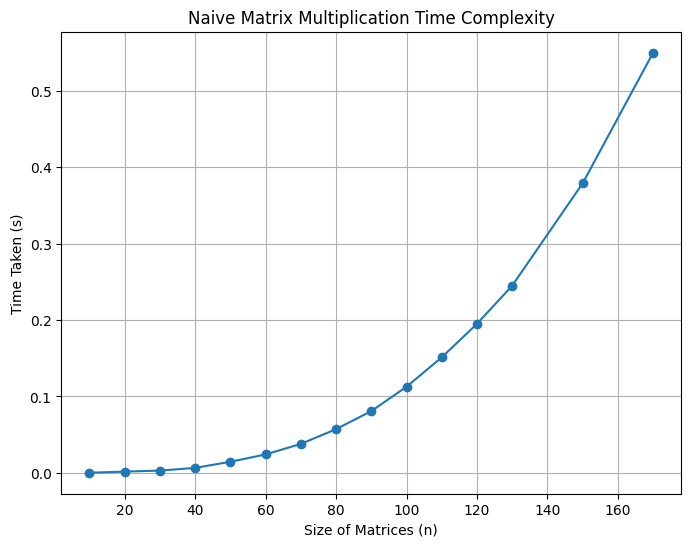

In [15]:
# Measuring time taken for matrix multiplication for different sizes
time_taken = [measure_time_naive(size) for size in matrix_sizes]


# Plotting the time complexity
plt.figure(figsize=(8, 6))
plt.plot(matrix_sizes, time_taken, marker='o', linestyle='-')
plt.xlabel('Size of Matrices (n)')
plt.ylabel('Time Taken (s)')
plt.title('Naive Matrix Multiplication Time Complexity')
plt.grid(True)
plt.show()

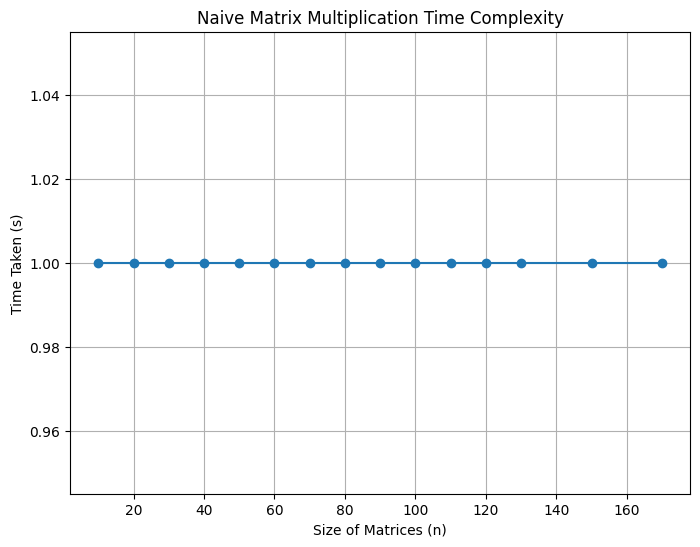

In [16]:
time_adjusted = [1 for i in range(len(matrix_sizes))]


# Plotting the time complexity
plt.figure(figsize=(8, 6))
plt.plot(matrix_sizes, time_adjusted, marker='o', linestyle='-')
plt.xlabel('Size of Matrices (n)')
plt.ylabel('Time Taken (s)')
plt.title('Naive Matrix Multiplication Time Complexity')
plt.grid(True)
plt.show()

>**_question 3_** **Multiplication numpy**<br>
Même question pour la multiplication `@` de numpy.

In [17]:
def measure_time_numpy(n,k=10):
    mean = 0

    
    return mean/k

# Varying sizes of matrices for multiplication
matrix_sizes_np = np.logspace(1,3.5,num = 100)

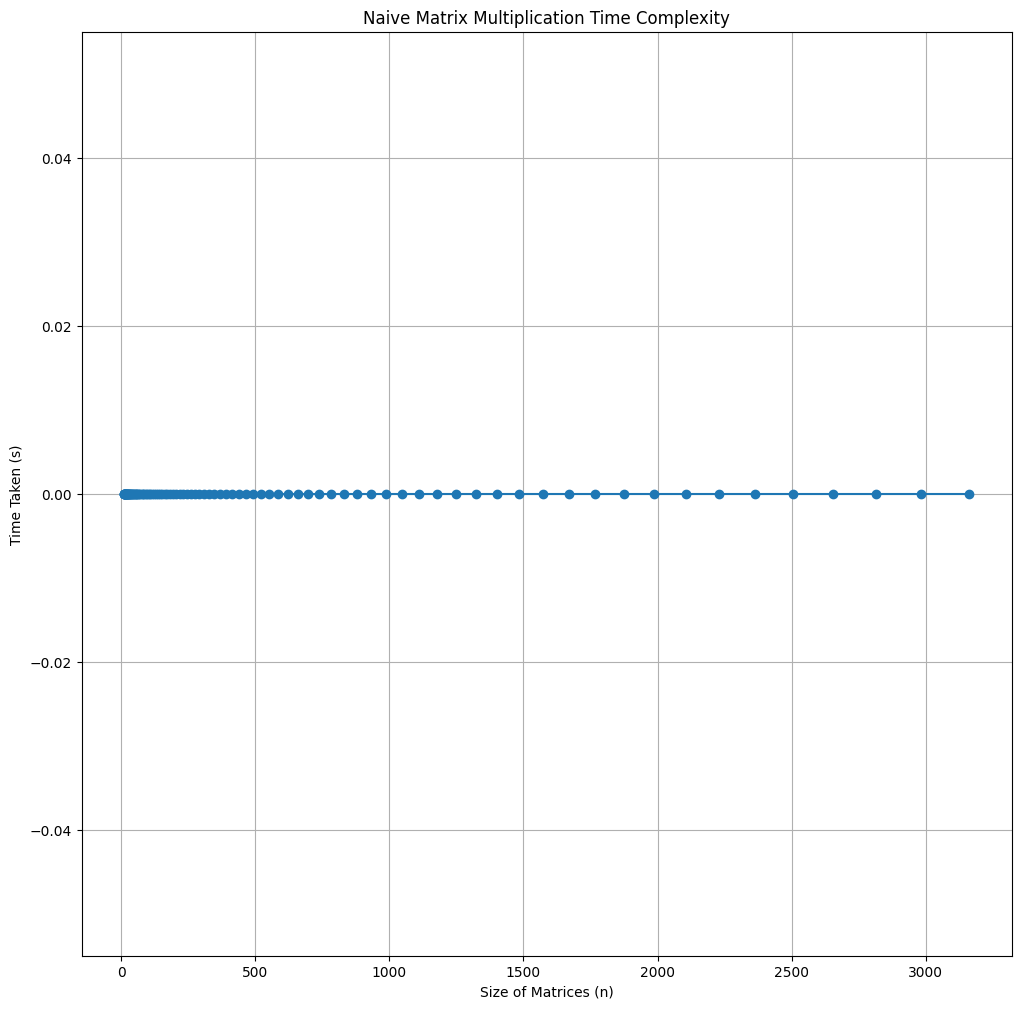

In [18]:
# Measuring time taken for matrix multiplication for different sizes
time_taken_np = [measure_time_numpy(int(size)) for size in matrix_sizes_np]


# Plotting the time complexity
plt.figure(figsize=(12,12))
plt.plot(matrix_sizes_np, time_taken_np, marker='o', linestyle='-')
plt.xlabel('Size of Matrices (n)')
plt.ylabel('Time Taken (s)')
plt.title('Naive Matrix Multiplication Time Complexity')
plt.grid(True)
plt.show()

In [19]:
offset = 10
# Plotting the time complexity
plt.figure(figsize=(8, 6))
plt.plot(matrix_sizes_np[offset:], time_adjusted_np[offset:], marker='o', linestyle='-')
plt.xlabel('Size of Matrices (n)')
plt.ylabel('Time Taken (s)')
plt.title('Naive Matrix Multiplication Time Complexity')
plt.grid(True)
plt.show()

NameError: name 'time_adjusted_np' is not defined

<Figure size 800x600 with 0 Axes>

# Bonus :  Résolution de systèmes en python

Pour ceux et celles qui ont tout fini, on va implémenter l'algorithme du pivot de Gauss

>**_question 1_** <br>
Ecrire une fonction `gauss_pivot` qui prends en entrée un numpy array `A` et un vecteur `b` et essaye de résoudre le système $Ax = b$<br>
On se contentera de résoudre le système dans le cas le plus simple :
- les tailles sont cohérentes
- le système est résoluble de manière unique (i.e. $A$ est inversible)
- l'algorithme ne rencontre pas de pivot nul

In [116]:
def gauss_pivot(A, b):
  return -1

étape  0  le système est 
  [[  2.   1.  -1.   8.]
 [ -1.  -5.   2. -11.]
 [ -2.   2.   3.  -3.]]
-------------------- 
 elimination 
-------------------- 

-0.5
-1.0
étape  1  le système est 
  [[ 2.   1.  -1.   8. ]
 [ 0.  -4.5  1.5 -7. ]
 [ 0.   3.   2.   5. ]]
-0.6666666666666666
étape  2  le système est 
  [[ 2.          1.         -1.          8.        ]
 [ 0.         -4.5         1.5        -7.        ]
 [ 0.          0.          3.          0.33333333]]
étape  3  le système est 
  [[ 2.          1.         -1.          8.        ]
 [ 0.         -4.5         1.5        -7.        ]
 [ 0.          0.          3.          0.33333333]]
[[ 2.          1.         -1.          8.        ]
 [ 0.         -4.5         1.5        -7.        ]
 [ 0.          0.          3.          0.33333333]]
-------------------- 
 substitution 
-------------------- 

étape  3  le système est 
  [[ 2.          1.         -1.          8.11111111]
 [ 0.         -4.5         1.5        -7.16666667]
 [ 0.  

>**_question 2_** <br>
À l'aide d'un compteur ou d'un timer, estimer la complexité de votre algorithme.